# Pymaceuticals Inc.
---

### Analysis

- By Looking at the distribution of the tumor volume for each treatment group plot, we can notice that the final tumor volumes for Capomulin and Ramicane are relatively low compared to final tumor volumes for Infubinol and Ceftamin, although the outlier in Infubinol show that we can have the same results as in Capomulin and Ramicane at instances.

- By looking at the Capomulin treatment of mouse b128 we can notice that the tumor volume slightly increased at the first few days and then decreased until we reached around 35 days mark but it started to increase slightly again.

- If we look at the mouse weights vs the average tumor volume, we can see that there is a strong correlation between the mouse weights and the average tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_results.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_results[mouse_results[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupulicate_mouse_data = mouse_results.loc[mouse_results['Mouse ID'] == "g989"]
dupulicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results = mouse_results.loc[mouse_results["Mouse ID"] != "g989"]
mouse_results.head(20) 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_results["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
stat_summary = mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = stat_summary.mean().rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
median = stat_summary.median().rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
variance = stat_summary.var().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
standard_deviation = stat_summary.std().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
sem = stat_summary.sem().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})
# Assemble the resulting series into a single summary DataFrame.
summary_list = [mean, median, variance, standard_deviation, sem]
summary_df = pd.concat(summary_list, axis=1)
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = stat_summary.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

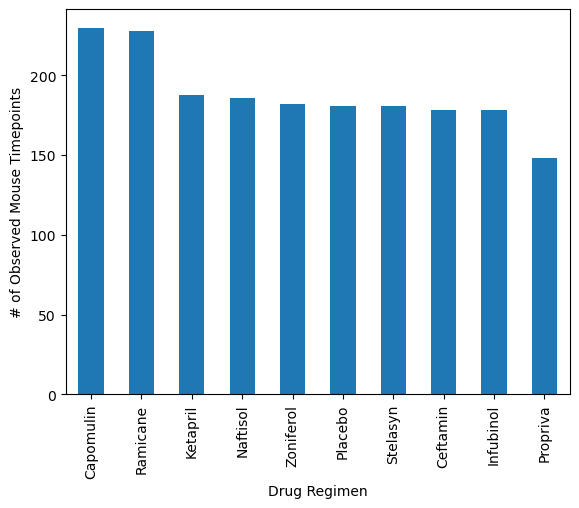

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = mouse_results.groupby("Drug Regimen")
drug_regimen_counts = drug_regimen["Drug Regimen"].count().sort_values(ascending=False)
drug_regimen_chart = drug_regimen_counts.plot(kind="bar", figsize=(6.5,5), xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

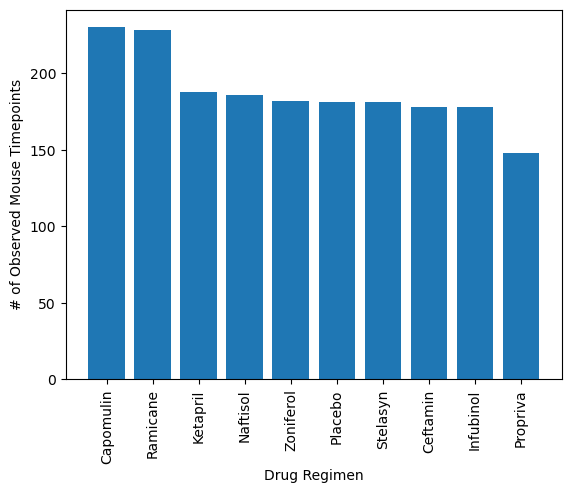

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen_counts.index
count = drug_regimen_counts.values
plt.xticks(rotation='vertical')
plt.bar(x_axis, count, color='#1f77b4', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

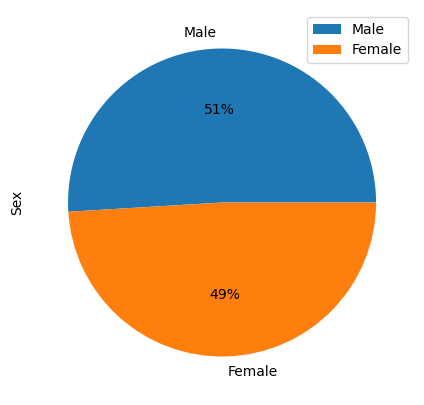

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = mouse_results[["Mouse ID", "Sex"]].groupby(['Sex']).count().apply(lambda x: x/len(mouse_results) * 100)
mice_sex = mice_sex.sort_values("Sex", ascending=False)
pie_plot = mice_sex.plot(kind='pie', subplots=True, figsize=(5, 5), autopct="%.0f%%", ylabel="Sex")
plt.show()

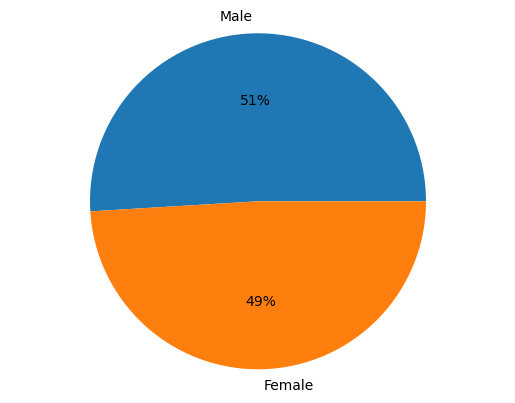

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_sex.index.tolist()
percentages = list(mice_sex["Mouse ID"])
plt.pie(percentages, labels=labels, autopct="%.0f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cleaned_df = mouse_results.loc[(mouse_results["Drug Regimen"] == "Capomulin") | (mouse_results["Drug Regimen"] =="Ramicane") | 
                               (mouse_results["Drug Regimen"] =="Infubinol") | (mouse_results["Drug Regimen"] =="Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
grouped_df = pd.DataFrame(study_results[["Mouse ID", "Timepoint"]].groupby("Mouse ID")["Timepoint"].max().reset_index())
grouped_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_treatments = pd.merge(grouped_df, cleaned_df, on=["Mouse ID", "Timepoint"])
final_treatments

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol= final_treatments.loc[final_treatments["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{treatment}'s potential outliers:{outliers}")



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


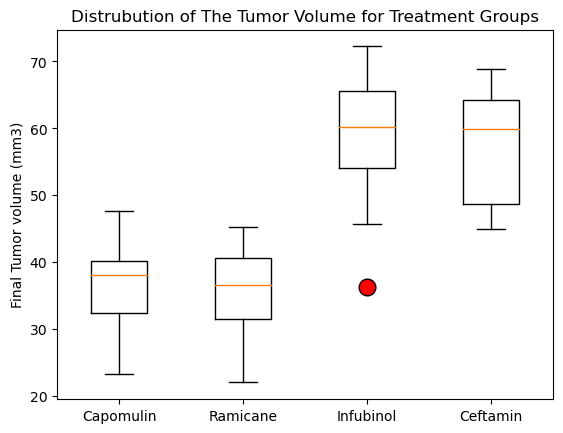

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data = [tumor_vol_list[0].array, tumor_vol_list[1].array, tumor_vol_list[2].array, tumor_vol_list[3].array]
fig, axs = plt.subplots()
axs.boxplot(data,flierprops= dict(marker='o', markersize=12, markerfacecolor='red', markeredgecolor='black'))
axs.set_xticklabels(treatment_list)
axs.set_ylabel('Final Tumor volume (mm3)')
axs.set_title('Distrubution of The Tumor Volume for Treatment Groups')
plt.show()


## Line and Scatter Plots

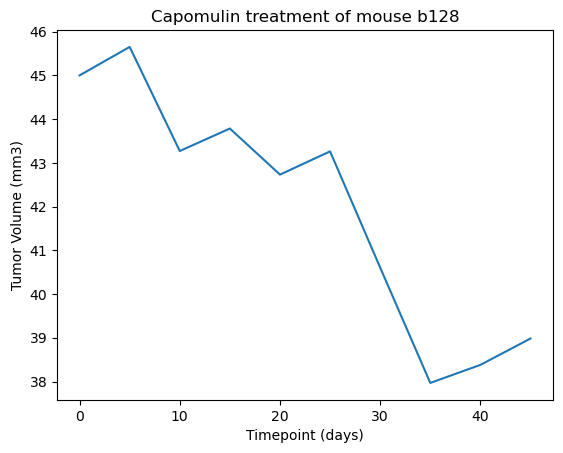

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = mouse_results.loc[mouse_results["Mouse ID"] == "b128", "Timepoint"]
points = mouse_results.loc[mouse_results["Mouse ID"] == "b128" , "Tumor Volume (mm3)"]
plt.plot(x_axis, points)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

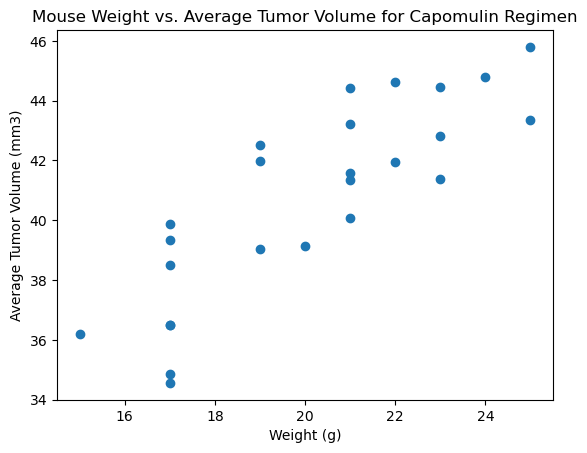

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()
tumor_volume_avg = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84 


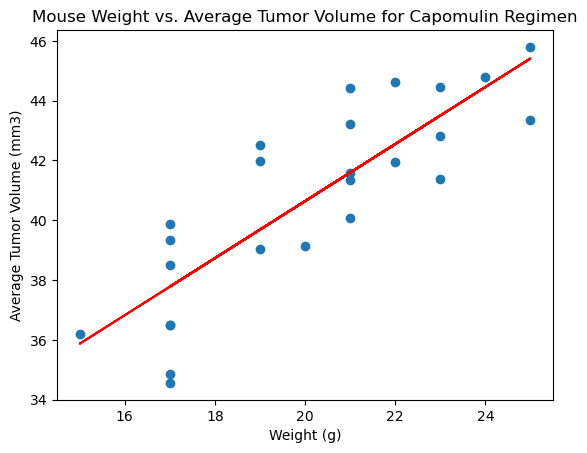

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()
tumor_volume_avg = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume_avg)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, "r-")
print(f"The correlation between mouse weight and the average tumor volume is  {round(rvalue,2)} ")
plt.show()